# Overall performance acc画图

读取准确率的数据

In [1]:
import pandas as pd


# # 文件路径
# qldpc_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/overall_performance_qldpc_code_acc_results.csv"
# qldpc_df = pd.read_csv(qldpc_file_path)
# 合并部分新的qldpc code数据
# qldpc_file_path_bposd = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/overall_performance_qldpc_code_acc_results_r_d_bposd.csv"
# # 读取CSV文件
# qldpc_df_bposd = pd.read_csv(qldpc_file_path_bposd)\
    
# qldpc_df = pd.concat([qldpc_df, qldpc_df_bposd], ignore_index=True)


qldpc_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/overall_performance_qldpc_code_acc_results_20250513_155808.csv"
# # 读取CSV文件
qldpc_df = pd.read_csv(qldpc_file_path)

In [2]:
# surface_code_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/overall_performance_surface_code_acc_results.csv"
# surface_code_df = pd.read_csv(surface_code_file_path)

# r_d_mld_emld_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/overall_performance_surface_code_acc_results_r_d_mld_epmld.csv"
# r_d_mld_emld_df = pd.read_csv(r_d_mld_emld_path)

# surface_code_df = pd.concat([surface_code_df, r_d_mld_emld_df], ignore_index=True)

# 使用最新的实验数据

surface_code_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/overall_performance_surface_code_acc_results_20250513_155242.csv"
surface_code_df = pd.read_csv(surface_code_file_path)

In [3]:
# qldpc_df

In [4]:
# surface_code_df

In [5]:
# colors = {
#     "MWPM": '#FFB6C1',  # 淡粉红
#     "BP+OSD": '#98FB98',  # 淡草绿
#     "TN-MLD": '#ADD8E6',  # 淡天蓝
#     "MLD": '#FFDAB9',  # 淡桃色
#     "EMLD": '#DDA0DD',  # 淡紫罗兰色
#     "EAMLD": '#AFEEEE',  # 淡青色
# }

# colors = {
#     "MWPM": '#FF69B4',  # 深粉红
#     "BP+OSD": '#32CD32',  # 深草绿
#     # "TN-MLD": '#1E90FF',  # 深天蓝
#     "MLD": '#FF8C69',  # 深桃色
#     "EMLD": '#BA55D3',  # 深紫罗兰色
#     "EAMLD": '#40E0D0',  # 深青色
# }
# colors = {
#     "MWPM": '#FF69B4',     # 深粉红（保留原色，经典算法高对比）
#     "BP+OSD": '#FF4500',   # 橙红
#     "MLD": '#1E90FF',      # 深天蓝（原TN-MLD色分配给MLD，冷色系核心）
#     "EMLD": '#BA55D3',     # 深紫罗兰（保留原色，紫色系区分）
#     "EAMLD": '#40E0D0',    # 青色
# }
# colors = {
#     "MWPM": '#3A6EA5',     # 蓝
#     "BP+OSD": '#5FB3D1',   # 青
#     "MLD": '#9BBF88',      # 绿
#     "EMLD": '#E89C31',     # 橙色
#     "EAMLD": '#C9737A',    # 粉
# }
colors = {
    "MWPM": '#3A6EA5',     # 蓝
    "BP+OSD": '#E89C31',   # 橙色
    "MLD": '#C9737A',      # 粉
    "EMLD": '#5FB3D1',     # 青
    "EAMLD": '#9BBF88',    # 绿
}


markers = {
    "MWPM": '.',  
    "BP+OSD": '.',  
    # "TN-MLD": '.',  
    "MLD": 'X',  
    "EMLD": 'P',  
    "EAMLD": '.',  
}


linestyles = {
    "MWPM": '-',  
    "BP+OSD": '-',  
    # "TN-MLD": '-',  
    "MLD": '-',  
    "EMLD": '-', 
    "EAMLD": '-', 
}

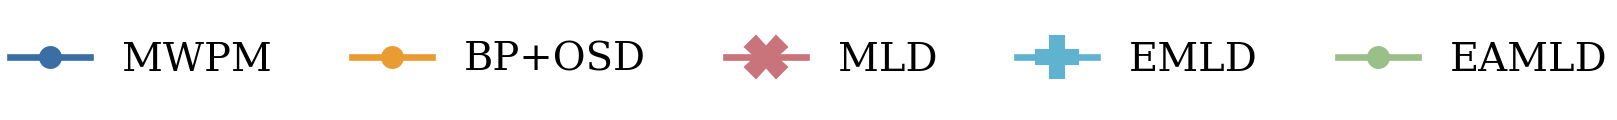

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path

plt.rcParams['font.family'] = 'serif'  # 使用衬线字体

# 创建图例元素
legend_elements = []
for key in colors.keys():
    line = Line2D([0], [0], color=colors[key], marker=markers[key], linestyle=linestyles[key],
                  label=key, markersize=20*1.5, linewidth=4*1.2, markeredgewidth=1.5)
    legend_elements.append(line)

# prop={'size': 24*1.2, 'family': 'serif', 'weight': 'bold'}
prop={'size': 24*1.2}

# 创建一个空的图形
fig, ax = plt.subplots(figsize=(len(legend_elements)*2, 1))  # 根据图例数量调整宽度

ax.legend(handles=legend_elements, loc='center', ncol=len(legend_elements), 
          frameon=False, borderpad=0, prop=prop)  # 设置字体大小为12

# 隐藏坐标轴和边框
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 去除空白边距

# 保存图片为PDF
save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/overall_performance_result")
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / f"overall_performance_result_legend.pdf"
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

## 根据上述legend进行具体画图

### r=1,surface code

* 纵坐标为Logical Error Rate，横坐标为 number of detectors.

In [7]:
# 1. 合并X和Z，logical_error_rate取平均值
merged_df = surface_code_df.groupby(['detector_number', 'd', 'round',
                                      'approximate_param','priority', 'priority_topk',
                                        'decoder_method','have_stabilizer']
                                    , as_index=False)['logical_error_rate'].mean()

# 2. 筛选r=1的数据
r1_df = merged_df[merged_df['round'] == 1]


In [8]:
r1_df

,detector_number,d,round,approximate_param,priority,priority_topk,decoder_method,have_stabilizer,logical_error_rate
0,4,3,1,100,-2,150,EAMLD,False,0.005535
1,4,3,1,100,-2,150,EMLD,False,0.005535
2,4,3,1,100,-2,150,MLD,False,0.005535
3,4,3,1,100,-2,150,MWPM,False,0.005535
4,12,5,1,100,-2,150,EAMLD,False,0.009765
5,12,5,1,100,-2,150,EMLD,False,0.009765
6,12,5,1,100,-2,150,MLD,False,0.009765
7,12,5,1,100,-2,150,MWPM,False,0.009765
12,24,7,1,100,-2,150,EAMLD,False,0.014745
13,24,7,1,100,-2,150,EMLD,False,0.014745


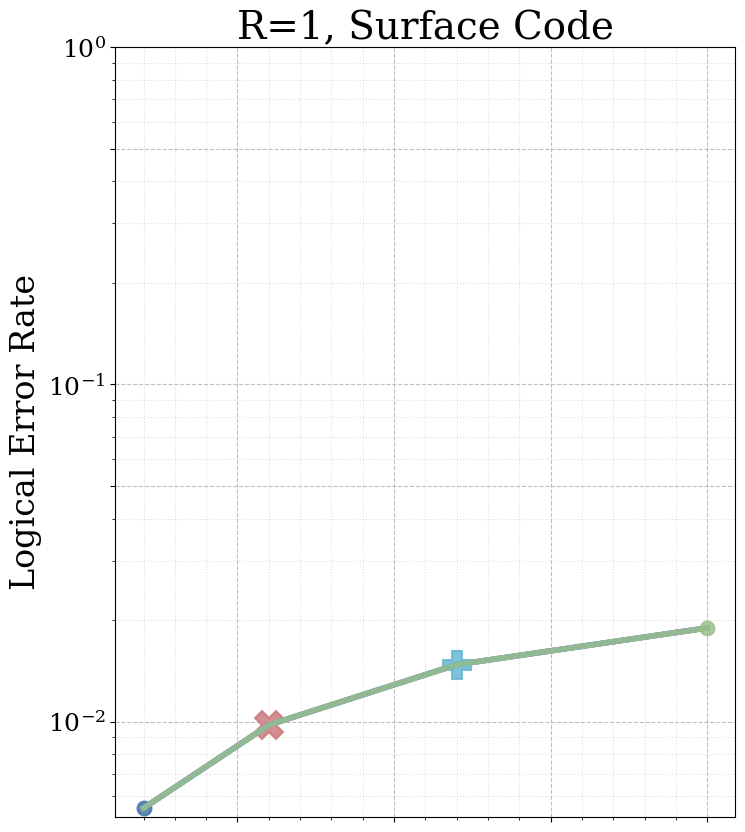

In [9]:
import matplotlib.pyplot as plt

sorted_methods = ["MWPM", "BP+OSD", "MLD", "EMLD", "EAMLD"]

# 调整图片大小
plt.figure(figsize=(8, 10))

markevery = (0, r1_df['decoder_method'].nunique())
for label in sorted_methods:
    if label in r1_df['decoder_method'].unique():
        group = r1_df[r1_df['decoder_method'] == label]
        # 调整线条宽度和标记大小
        plt.plot(group['detector_number'],
                 group['logical_error_rate'],
                 color=colors[label],
                 marker=markers[label],
                 linestyle=linestyles[label],
                 label=label,
                 alpha=0.8,
                 markersize=20,  # 增大标记大小
                 linewidth=4,  # 增大线条宽度
                 markevery=markevery,
                 markeredgewidth=1.5)  # 增大标记边缘宽度
        markevery = (markevery[0]+1, markevery[1])

# 添加标题
plt.title('R=1, Surface Code', fontsize=28)

# 设置坐标轴标签，调整字体大小
# plt.xlabel('number of detectors', fontsize=24)
plt.ylabel('Logical Error Rate', fontsize=24)

# 设置刻度字体大小
# 存在刻度:
# plt.xticks([10, 20, 30, 40], fontsize=14)
# 不存在刻度
plt.xticks([10, 20, 30, 40], [], fontsize=18)

# 对 y 轴进行对数处理
plt.yscale('log')

# 设置 y 轴刻度值
ticks = [0.01, 0.05, 0.1, 0.5, 1]
plt.yticks(ticks = ticks, minor = False, fontsize=18)

# 添加网格
# 开启次刻度
plt.minorticks_on()

# 添加主网格
plt.grid(True, linestyle='--', alpha=0.8, which='major')
# 添加次网格
plt.grid(True, linestyle=':', alpha=0.4, which='minor')

# 显示图形
plt.show()

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


def plot_logical_error_rate(df, r, code, colors, markers, linestyles, x_ticks=[10, 20, 30, 40], show_x_ticks=True, show_y_ticks=True, y_ticks=[0.01, 0.05, 0.1, 0.5, 1], use_markevery=True):
    sorted_methods = ["MWPM", "BP+OSD", "MLD", "EMLD", "EAMLD"]
    # 调整图片大小为 (8, 10)
    plt.figure(figsize=(8, 10))

    if use_markevery:
        markevery = (0, df['decoder_method'].nunique())
    else:
        markevery = None

    for label in sorted_methods:
        if label in df['decoder_method'].unique():
            group = df[df['decoder_method'] == label]
            # 调整线条宽度和标记大小
            plt.plot(group['detector_number'],
                     group['logical_error_rate'],
                     color=colors[label],
                     marker=markers[label],
                     linestyle=linestyles[label],
                     label=label,
                     alpha=0.8,
                     markersize=20,  # 增大标记大小
                     linewidth=4,  # 增大线条宽度
                     markevery=markevery,
                     markeredgewidth=1.5)  # 增大标记边缘宽度
            if use_markevery:
                markevery = (markevery[0] + 1, markevery[1])

    # 根据 r 和 code 参数设置标题
    title = f'R={r}, {code}'
    plt.title(title, fontsize=28)

    # 设置坐标轴标签，调整字体大小
    # 设置 x 轴刻度字体大小
    if show_x_ticks:
        plt.xlabel('number of detectors', fontsize=24)
        plt.xticks(x_ticks, fontsize=18)
        plt.tick_params(axis='x', which='minor', bottom=False)  # 隐藏 x 轴次刻度
    else:
        plt.xticks(x_ticks, [], fontsize=18)
        plt.tick_params(axis='x', which='minor', bottom=False)  # 隐藏 x 轴次刻度

    # 对 y 轴进行对数处理
    plt.yscale('log')

    # 设置 y 轴刻度值
    if show_y_ticks:
        plt.ylabel('Logical Error Rate', fontsize=24)
        plt.yticks(ticks=y_ticks, minor=False, fontsize=18)
    else:
        plt.yticks(y_ticks, [], fontsize=18)

    # 添加网格
    # 开启次刻度
    plt.minorticks_on()

    # 添加 x 轴主网格
    plt.grid(True, linestyle='--', alpha=0.8, which='major', axis='x')
    # 隐藏 x 轴次网格
    plt.grid(False, which='minor', axis='x')

    # 添加 y 轴主网格和次网格
    plt.grid(True, linestyle='--', alpha=0.8, which='major', axis='y')
    plt.grid(True, linestyle=':', alpha=0.4, which='minor', axis='y')

    # 保存图片为PDF
    # save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/overall_performance_result")
    # save_dir.mkdir(parents=True, exist_ok=True)
    # save_path = save_dir / f"{title}acc.pdf"
    # plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

    # 显示图形
    plt.show()
    

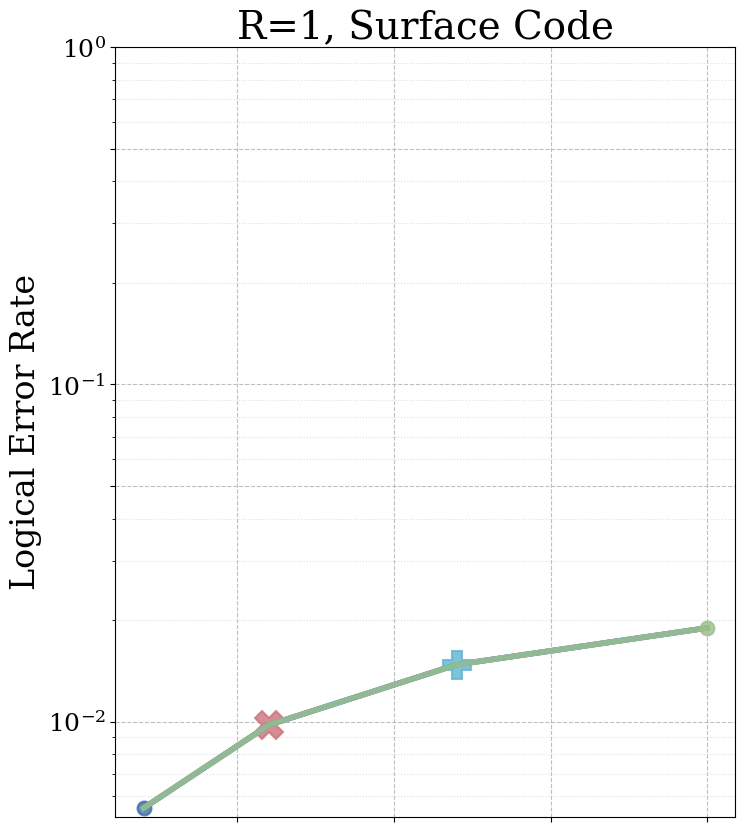

In [11]:
plot_logical_error_rate(r1_df, r=1, code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks = True)

# 其他情况下

### surface code r=d

In [12]:
# 1. 合并X和Z，logical_error_rate取平均值
merged_df = surface_code_df.groupby(['detector_number', 'd', 'round',
                                      'approximate_param','priority', 'priority_topk',
                                        'decoder_method','have_stabilizer']
                                    , as_index=False)['logical_error_rate'].mean()

# 2. 筛选r=1的数据
rd_df = merged_df[merged_df['round'] != 1]


In [13]:
rd_df

,detector_number,d,round,approximate_param,priority,priority_topk,decoder_method,have_stabilizer,logical_error_rate
8,20,3,3,100,-2,150,EAMLD,False,0.009640
9,20,3,3,100,-2,150,EMLD,False,0.009640
10,20,3,3,100,-2,150,MLD,False,0.009640
11,20,3,3,100,-2,150,MWPM,False,0.017865
20,108,5,5,100,-2,150,EAMLD,False,0.016475
21,108,5,5,100,-2,150,MWPM,False,0.030695
22,312,7,7,100,-2,150,EAMLD,False,0.023695
23,312,7,7,100,-2,150,MWPM,False,0.041690
24,680,9,9,100,-2,150,EAMLD,False,0.034225
25,680,9,9,100,-2,150,MWPM,False,0.053410


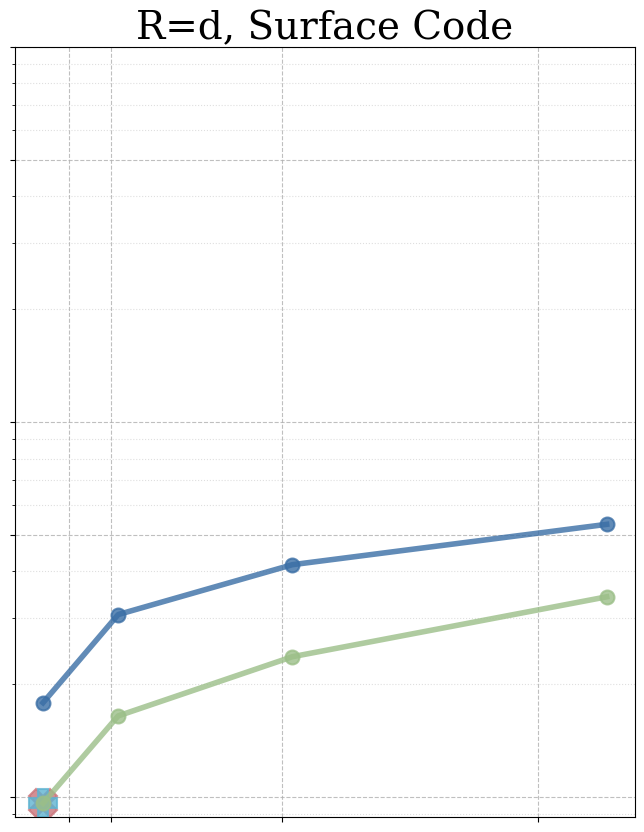

In [14]:
plot_logical_error_rate(rd_df, r="d", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks = False, x_ticks=[50, 100, 300, 600], use_markevery=False)

In [15]:
qldpc_df

,code_task,detector_number,nkd,round,approximate_param,priority,priority_topk,decoder_method,logical_error_rate,have_stabilizer
0,bivariate_bicycle_code:rotated_memory_x,36,"[72, 12, 6]",1,100,-2,150,BP+OSD,0.36656,False
1,bivariate_bicycle_code:rotated_memory_x,36,"[72, 12, 6]",1,100,-2,150,EAMLD,0.14218,False
2,bivariate_bicycle_code:rotated_memory_x,396,"[72, 12, 6]",6,100,-2,150,BP+OSD,0.50182,False
3,bivariate_bicycle_code:rotated_memory_x,396,"[72, 12, 6]",6,100,-2,150,EAMLD,0.19742,False
4,bivariate_bicycle_code:rotated_memory_x,45,"[90, 8, 10]",1,100,-2,150,BP+OSD,0.40505,False
5,bivariate_bicycle_code:rotated_memory_x,45,"[90, 8, 10]",1,100,-2,150,EAMLD,0.15978,False
6,bivariate_bicycle_code:rotated_memory_x,855,"[90, 8, 10]",10,100,-2,150,EAMLD,0.41590,False
7,bivariate_bicycle_code:rotated_memory_x,54,"[108, 8, 10]",1,100,-2,150,BP+OSD,0.43433,False
8,bivariate_bicycle_code:rotated_memory_x,54,"[108, 8, 10]",1,100,-2,150,EAMLD,0.17318,False
9,bivariate_bicycle_code:rotated_memory_x,1026,"[108, 8, 10]",10,100,-2,150,EAMLD,0.50946,False


### qldpc r=1

In [16]:
# 1. 合并X和Z，logical_error_rate取平均值
qldpc_merged_df = qldpc_df.groupby(['detector_number', 'nkd', 'round',
                                      'approximate_param','priority', 'priority_topk',
                                        'decoder_method','have_stabilizer']
                                    , as_index=False)['logical_error_rate'].mean()

# 2. 筛选r=1的数据
qldpc_r1_df = qldpc_merged_df[qldpc_merged_df['round'] == 1]


In [17]:
qldpc_r1_df

,detector_number,nkd,round,approximate_param,priority,priority_topk,decoder_method,have_stabilizer,logical_error_rate
0,36,"[72, 12, 6]",1,100,-2,150,BP+OSD,False,0.371080
1,36,"[72, 12, 6]",1,100,-2,150,EAMLD,False,0.159630
2,45,"[90, 8, 10]",1,100,-2,150,BP+OSD,False,0.413645
3,45,"[90, 8, 10]",1,100,-2,150,EAMLD,False,0.175805
4,54,"[108, 8, 10]",1,100,-2,150,BP+OSD,False,0.453175
5,54,"[108, 8, 10]",1,100,-2,150,EAMLD,False,0.198800
6,72,"[144, 12, 12]",1,100,-2,150,BP+OSD,False,0.592830
7,72,"[144, 12, 12]",1,100,-2,150,EAMLD,False,0.276630


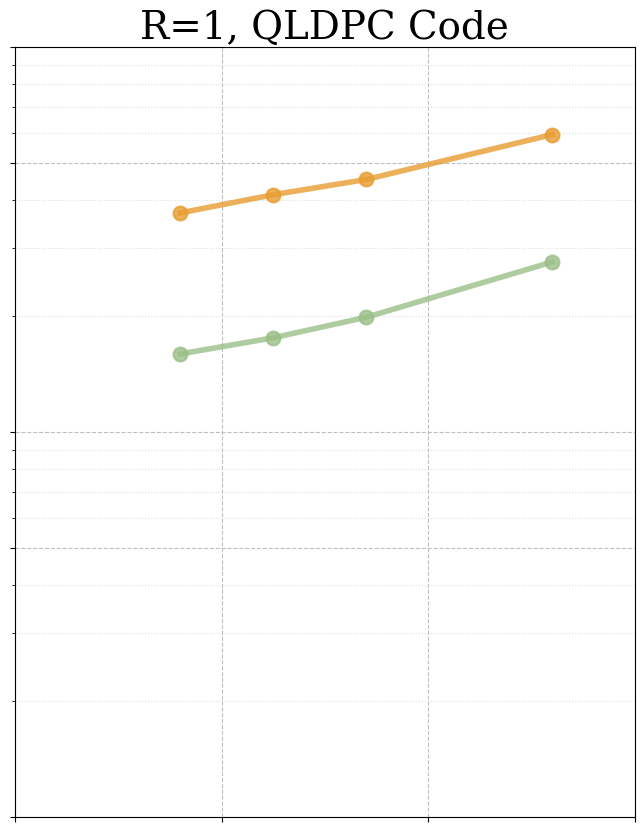

In [18]:
plot_logical_error_rate(qldpc_r1_df, r="1", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks = False, x_ticks=[20, 40, 60, 80], use_markevery = False)

### qldpc r=d

In [19]:
# 1. 合并X和Z，logical_error_rate取平均值
qldpc_merged_df = qldpc_df.groupby(['detector_number', 'nkd', 'round',
                                      'approximate_param','priority', 'priority_topk',
                                        'decoder_method','have_stabilizer']
                                    , as_index=False)['logical_error_rate'].mean()

# 2. 筛选r=1的数据
qldpc_rd_df = qldpc_merged_df[qldpc_merged_df['round'] != 1]
qldpc_rd_df

,detector_number,nkd,round,approximate_param,priority,priority_topk,decoder_method,have_stabilizer,logical_error_rate
8,396,"[72, 12, 6]",6,100,-2,150,BP+OSD,False,0.518775
9,396,"[72, 12, 6]",6,100,-2,150,EAMLD,False,0.210425
10,855,"[90, 8, 10]",10,100,-2,150,EAMLD,False,0.427210
11,1026,"[108, 8, 10]",10,100,-2,150,EAMLD,False,0.523635
12,1656,"[144, 12, 12]",12,100,-2,150,EAMLD,False,0.795570


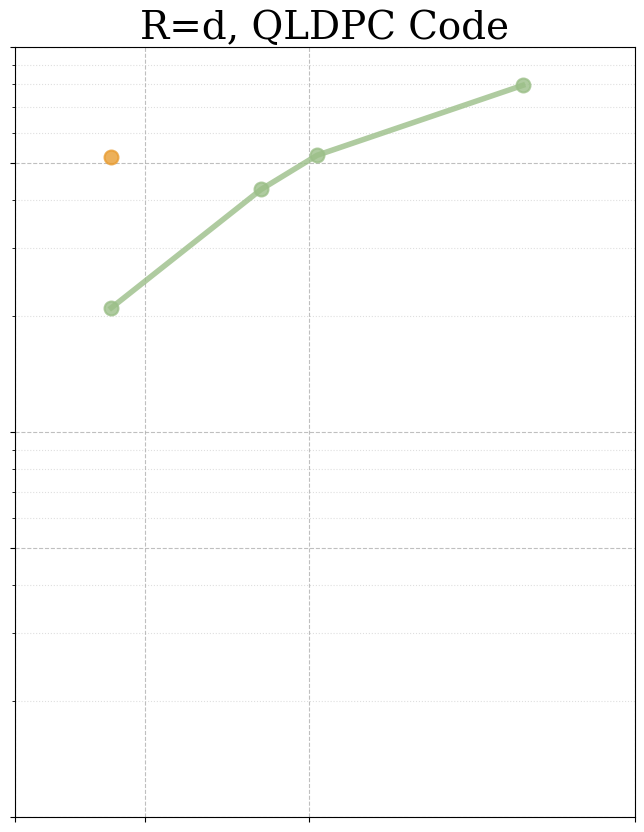

In [20]:
plot_logical_error_rate(qldpc_rd_df, r="d", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks = False, x_ticks=[100, 500, 1000, 2000], use_markevery = False)

## merge

In [21]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from pathlib import Path


# def plot_logical_error_rate_ax(ax, df, r, code, colors, markers, linestyles, x_ticks=[10, 20, 30, 40], show_x_ticks=True, show_y_ticks=True, y_ticks=[0.01, 0.05, 0.1, 0.5, 1], use_markevery=True):
#     sorted_methods = ["MWPM", "BP+OSD", "TN-MLD", "MLD", "EMLD", "EAMLD"]

#     if use_markevery:
#         markevery = (0, df['decoder_method'].nunique())
#     else:
#         markevery = None

#     for label in sorted_methods:
#         if label in df['decoder_method'].unique():
#             group = df[df['decoder_method'] == label]
#             ax.plot(group['detector_number'],
#                     group['logical_error_rate'],
#                     color=colors[label],
#                     marker=markers[label],
#                     linestyle=linestyles[label],
#                     label=label,
#                     alpha=0.8,
#                     markersize=20,
#                     linewidth=4,
#                     markevery=markevery,
#                     markeredgewidth=1.5)
#             if use_markevery:
#                 markevery = (markevery[0] + 1, markevery[1])

#     title = f'R={r}, {code}'
#     ax.set_title(title, fontsize=28)

#     if show_x_ticks:
#         ax.set_xlabel('number of detectors', fontsize=24)
#         ax.set_xticks(x_ticks)
#         ax.tick_params(axis='x', which='minor', bottom=False)
#         ax.tick_params(axis='x', labelsize=18)
#     else:
#         ax.set_xticks(x_ticks)
#         ax.set_xticklabels([])
#         ax.tick_params(axis='x', which='minor', bottom=False)
#         ax.tick_params(axis='x', labelsize=18)

#     ax.set_yscale('log')

#     if show_y_ticks:
#         ax.set_ylabel('Logical Error Rate', fontsize=24)
#         ax.set_yticks(ticks=y_ticks)
#         ax.tick_params(axis='y', labelsize=18)
#     else:
#         ax.set_yticks(y_ticks)
#         ax.set_yticklabels([])
#         ax.tick_params(axis='y', labelsize=18)

#     ax.minorticks_on()
#     ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='x')
#     ax.grid(False, which='minor', axis='x')
#     ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='y')
#     ax.grid(True, linestyle=':', alpha=0.4, which='minor', axis='y')


# fig, axes = plt.subplots(4, 1, figsize=(8, 40), sharey=True)

# plot_logical_error_rate_ax(axes[0], r1_df, r=1, code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=True)
# plot_logical_error_rate_ax(axes[1], rd_df, r="d", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[50, 100, 300, 600], use_markevery=False)
# plot_logical_error_rate_ax(axes[2], qldpc_r1_df, r="1", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[20, 40, 60, 80], use_markevery=False)
# plot_logical_error_rate_ax(axes[3], qldpc_rd_df, r="d", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, x_ticks=[100, 500, 1000, 2000], use_markevery=False)

# # 保存图片为PDF
# save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/overall_performance_result")
# save_dir.mkdir(parents=True, exist_ok=True)
# save_path = save_dir / "merged_plots.pdf"
# plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

# plt.show()
    

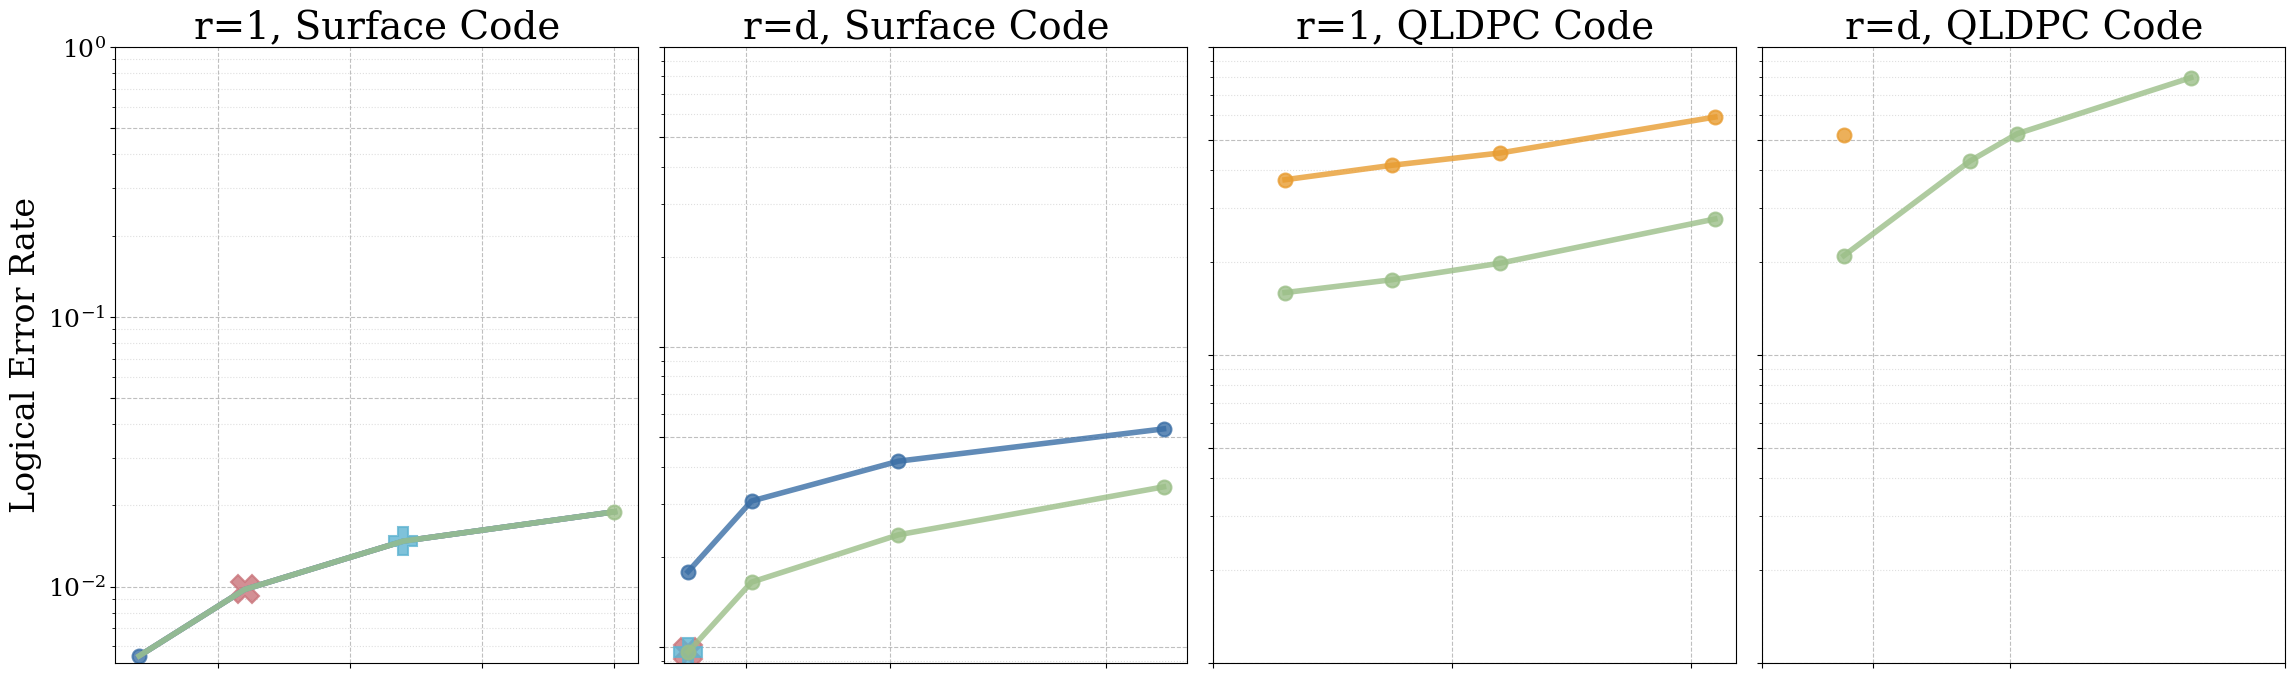

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


def plot_logical_error_rate_ax(ax, df, r, code, colors, markers, linestyles, x_ticks=[10, 20, 30, 40], show_x_ticks=True, show_y_ticks=True, y_ticks=[0.01, 0.05, 0.1, 0.5, 1], use_markevery=True):
    sorted_methods = ["MWPM", "BP+OSD", "MLD", "EMLD", "EAMLD"]

    if use_markevery:
        markevery = (0, df['decoder_method'].nunique())
    else:
        markevery = None

    for label in sorted_methods:
        if label in df['decoder_method'].unique():
            group = df[df['decoder_method'] == label]
            ax.plot(group['detector_number'],
                    group['logical_error_rate'],
                    color=colors[label],
                    marker=markers[label],
                    linestyle=linestyles[label],
                    label=label,
                    alpha=0.8,
                    markersize=20,
                    linewidth=4,
                    markevery=markevery,
                    markeredgewidth=1.5)
            if use_markevery:
                markevery = (markevery[0] + 1, markevery[1])

    title = f'r={r}, {code}'
    ax.set_title(title, fontsize=28)

    if show_x_ticks:
        ax.set_xlabel('number of detectors', fontsize=24)
        ax.set_xticks(x_ticks)
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=18)
    else:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([])
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=18)

    ax.set_yscale('log')

    if show_y_ticks:
        ax.set_ylabel('Logical Error Rate', fontsize=24)
        ax.set_yticks(ticks=y_ticks)
        ax.tick_params(axis='y', which='major', labelsize=18)
    else:
        ax.set_yticks(y_ticks)
        ax.set_yticklabels([])
        ax.tick_params(axis='y', which='major', labelsize=18)

    ax.minorticks_on()
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='x')
    ax.grid(False, which='minor', axis='x')
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='y')
    ax.grid(True, linestyle=':', alpha=0.4, which='minor', axis='y')


# fig, axes = plt.subplots(1, 4, figsize=(40, 8), sharey=True)
fig, axes = plt.subplots(1, 4, figsize=(28, 8))

plot_logical_error_rate_ax(axes[0], r1_df, r="1", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=True)
plot_logical_error_rate_ax(axes[1], rd_df, r="d", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[100, 300, 600], use_markevery=False)
plot_logical_error_rate_ax(axes[2], qldpc_r1_df, r="1", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[30, 50, 70], use_markevery=False)
plot_logical_error_rate_ax(axes[3], qldpc_rd_df, r="d", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[100, 500, 1000, 2000], use_markevery=False)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.05)  # wspace 控制子图之间的水平间距

# 保存图片为PDF
save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/overall_performance_result")
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / "merged_plots_row.pdf"
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

plt.show()
    

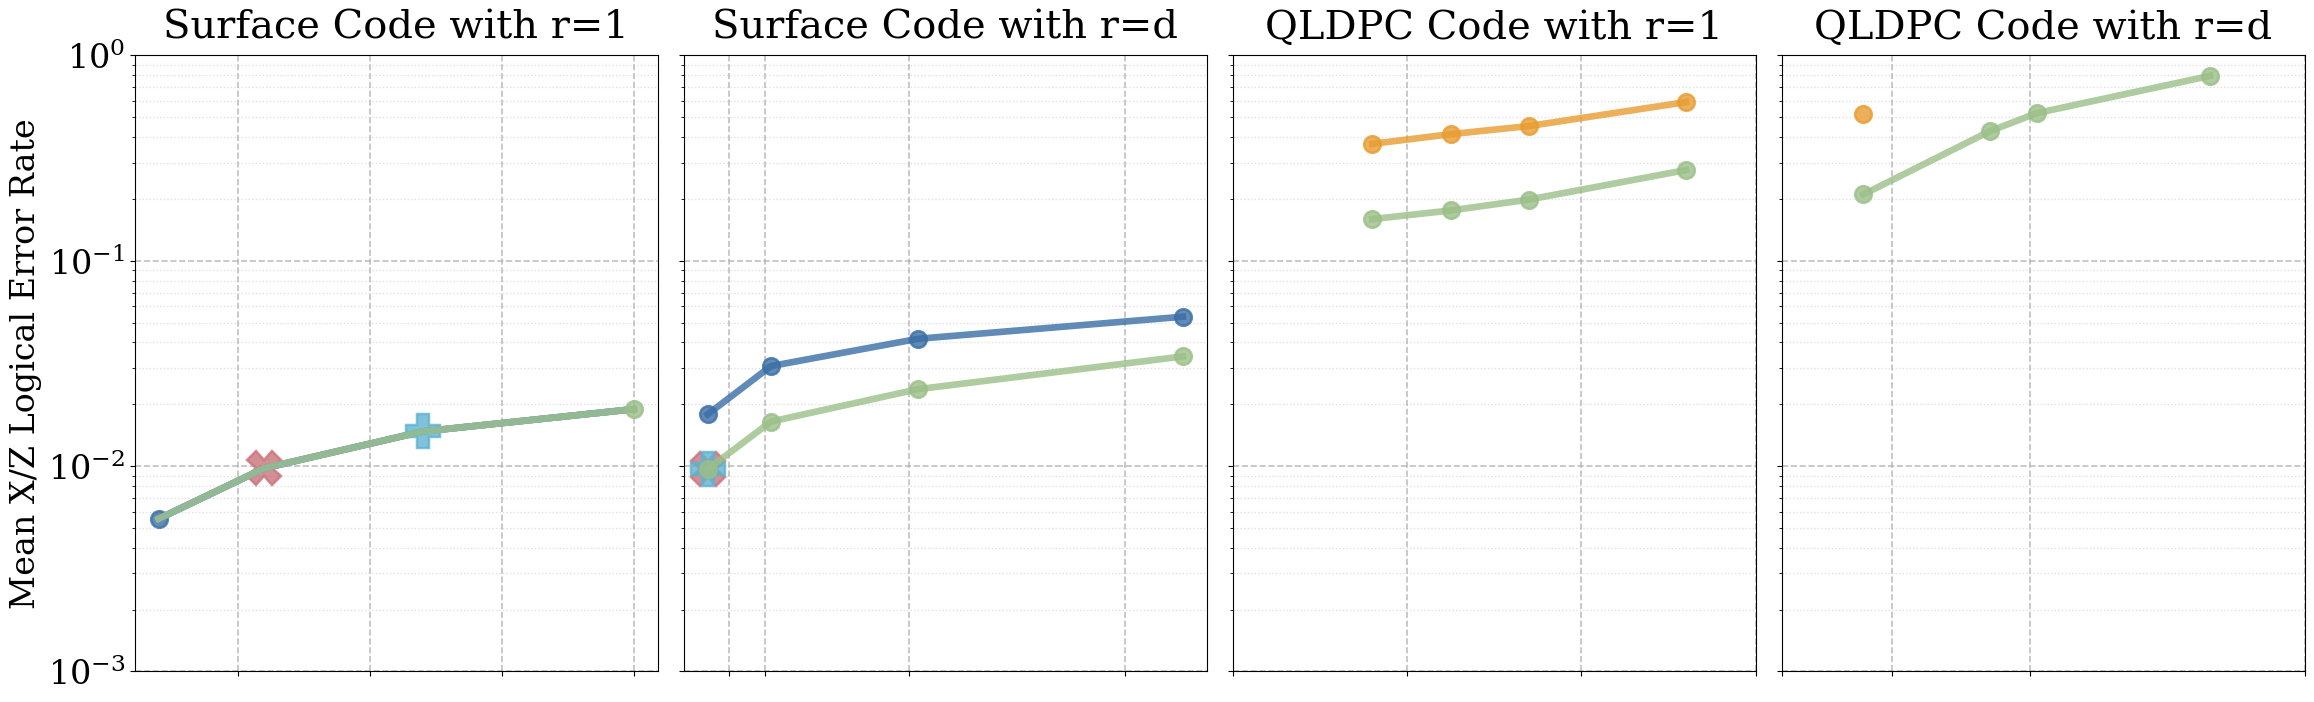

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# 设置全局缩放因子
SCALE_FACTOR = 1.2  # 根据需要调整这个值（1.2-2.0之间）

def plot_logical_error_rate_ax(ax, df, r, code, colors, markers, linestyles, 
                             x_ticks=[10, 20, 30, 40], show_x_ticks=True, 
                             show_y_ticks=True, y_ticks=[0.001, 0.01, 0.1, 1], 
                             use_markevery=True):
    # 按比例放大的参数
    TITLE_SIZE = 24 * SCALE_FACTOR
    LABEL_SIZE = 20 * SCALE_FACTOR
    TICK_SIZE = 20 * SCALE_FACTOR
    MARKER_SIZE = 20 * SCALE_FACTOR
    LINE_WIDTH = 4 * SCALE_FACTOR
    LEGEND_SIZE = 20 * SCALE_FACTOR
    
    sorted_methods = ["MWPM", "BP+OSD", "MLD", "EMLD", "EAMLD"]

    if use_markevery:
        markevery = (0, df['decoder_method'].nunique())
    else:
        markevery = None

    for label in sorted_methods:
        if label in df['decoder_method'].unique():
            group = df[df['decoder_method'] == label]
            ax.plot(group['detector_number'],
                    group['logical_error_rate'],
                    color=colors[label],
                    marker=markers[label],
                    linestyle=linestyles[label],
                    label=label,
                    alpha=0.8,
                    markersize=MARKER_SIZE,
                    linewidth=LINE_WIDTH,
                    markevery=markevery,
                    markeredgewidth=1.5*SCALE_FACTOR)
            if use_markevery:
                markevery = (markevery[0] + 1, markevery[1])

    title = f'{code} with r={r}'
    ax.set_title(title, fontsize=TITLE_SIZE, pad=10*SCALE_FACTOR)  # 增加标题间距

    if show_x_ticks:
        ax.set_xlabel('Number of Detectors', fontsize=LABEL_SIZE)
        ax.set_xticks(x_ticks)
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=TICK_SIZE)
    else:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([])
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=TICK_SIZE)

    ax.set_yscale('log')

    if show_y_ticks:
        ax.set_ylabel('Mean X/Z Logical Error Rate', fontsize=LABEL_SIZE)
        ax.set_yticks(y_ticks)
        # ax.set_yticklabels([f"{y:.2f}" if y < 0.1 else f"{y:.1f}" for y in y_ticks], 
                        #  fontsize=TICK_SIZE)
        ax.tick_params(axis='y', which='major', labelsize=TICK_SIZE)
    else:
        ax.set_yticks(y_ticks)
        ax.set_yticklabels([])
        ax.tick_params(axis='y', which='major', labelsize=TICK_SIZE)

    # 增强网格线可见性
    ax.minorticks_on()
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='x', linewidth=1*SCALE_FACTOR)
    ax.grid(False, which='minor', axis='x')
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='y', linewidth=1*SCALE_FACTOR)
    ax.grid(True, linestyle=':', alpha=0.4, which='minor', axis='y', linewidth=0.8*SCALE_FACTOR)

# 创建图形（保持原始尺寸）
fig, axes = plt.subplots(1, 4, figsize=(28, 8))

# 绘制子图
plot_logical_error_rate_ax(axes[0], r1_df, r="1", code='Surface Code', 
                         colors=colors, markers=markers, linestyles=linestyles,
                         show_x_ticks=False, show_y_ticks=True)
plot_logical_error_rate_ax(axes[1], rd_df, r="d", code='Surface Code',
                         colors=colors, markers=markers, linestyles=linestyles,
                         show_x_ticks=False, show_y_ticks=False, 
                         x_ticks=[50, 100, 300, 600], use_markevery=False)
plot_logical_error_rate_ax(axes[2], qldpc_r1_df, r="1", code='QLDPC Code',
                         colors=colors, markers=markers, linestyles=linestyles,
                         show_x_ticks=False, show_y_ticks=False, 
                         x_ticks=[20, 40, 60, 80], use_markevery=False)
plot_logical_error_rate_ax(axes[3], qldpc_rd_df, r="d", code='QLDPC Code',
                         colors=colors, markers=markers, linestyles=linestyles,
                         show_x_ticks=False, show_y_ticks=False, 
                         x_ticks=[100, 500, 1000, 2000], use_markevery=False)

# # 添加图例（统一放在图形底部）
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', 
#           ncol=len(labels), fontsize=20*SCALE_FACTOR,
#           bbox_to_anchor=(0.5, -0.05), frameon=True)

# # 调整布局
# plt.subplots_adjust(wspace=0.05, bottom=0.2)  # 为图例留出空间

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.05)  # wspace 控制子图之间的水平间距

# 保存图形
save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/overall_performance_result")
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / "merged_plots_row.pdf"
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

plt.show()

# 速度

In [24]:
import pandas as pd

# 文件路径
qldpc_file_path_speed1 = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/overall_performance_qldpc_code_speed_results.csv"

# 读取CSV文件
qldpc_df_speed1 = pd.read_csv(qldpc_file_path_speed1)

import pandas as pd

# 文件路径
qldpc_file_path_speed2 = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/overall_performance_qldpc_code_speed_results_bp_osd.csv"

# 读取CSV文件
qldpc_df_speed2 = pd.read_csv(qldpc_file_path_speed2)

In [25]:
qldpc_df_speed = pd.concat([qldpc_df_speed1, qldpc_df_speed2], ignore_index=True)


In [26]:
import pandas as pd

# 文件路径
surface_file_path_speed = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/overall_performance_surface_code_speed_results_new.csv"

# 读取CSV文件
surface_df_speed = pd.read_csv(surface_file_path_speed)


In [27]:
# surface_df_speed

In [28]:
# 1. 合并X和Z，logical_error_rate取平均值
merged_df_speed = surface_df_speed.groupby(['detector_number', 'd', 'round',
                                      'approximate_param','priority', 'priority_topk',
                                        'decoder_method','have_stabilizer']
                                    , as_index=False)['average_per_round_time'].mean()

# 2. 筛选r=1的数据
r1_df_speed = merged_df_speed[merged_df_speed['round'] == 1]
rd_df_speed = merged_df_speed[merged_df_speed['round'] != 1]

In [29]:
# 1. 合并X和Z，logical_error_rate取平均值
qldpc_merged_df_speed = qldpc_df_speed.groupby(['detector_number', 'nkd', 'round',
                                      'approximate_param','priority', 'priority_topk',
                                        'decoder_method','have_stabilizer']
                                    , as_index=False)['average_per_round_time'].mean()

# 2. 筛选r=1的数据
qldpc_r1_df_speed = qldpc_merged_df_speed[qldpc_merged_df_speed['round'] == 1]
qldpc_rd_df_speed = qldpc_merged_df_speed[qldpc_merged_df_speed['round'] != 1]

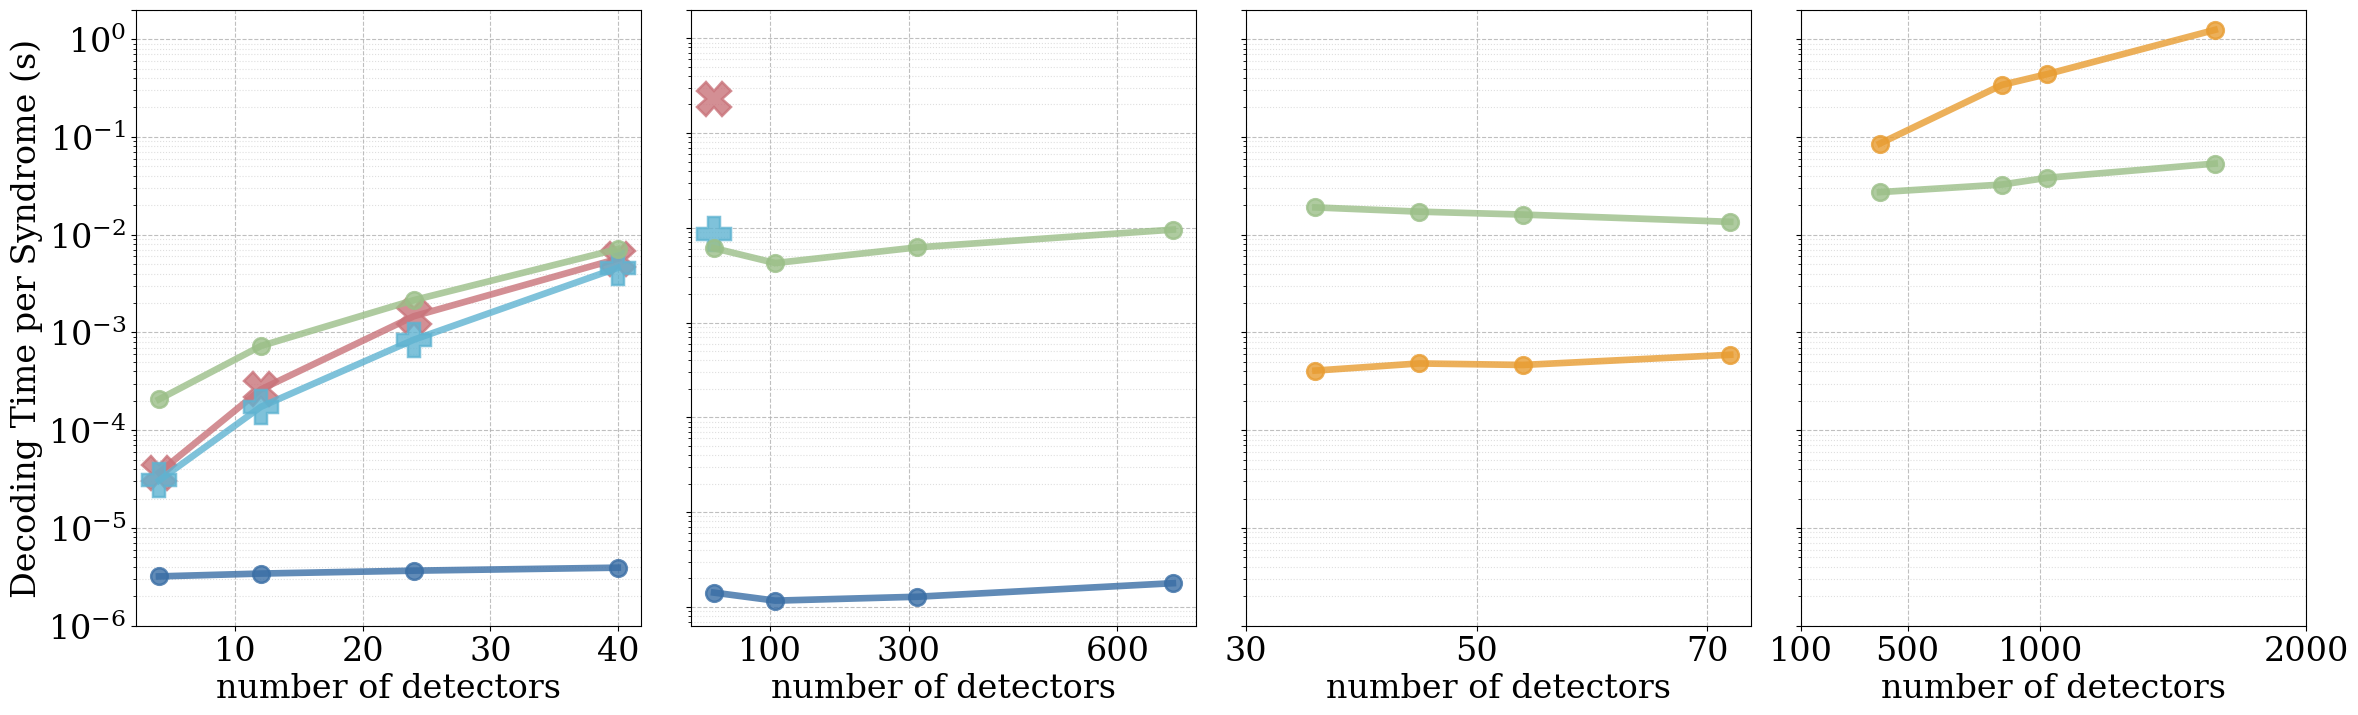

In [30]:
SCALE_FACTOR = 1.2

def plot_speed_ax(ax, df, r, code, colors, markers, linestyles, x_ticks=[10, 20, 30, 40], show_x_ticks=True, show_y_ticks=True, y_ticks=[10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1), 10**(0), 2], use_markevery=True):
    sorted_methods = ["MWPM", "BP+OSD", "MLD", "EMLD", "EAMLD"]

    # 按比例放大的参数
    # TITLE_SIZE = 28 * SCALE_FACTOR
    LABEL_SIZE = 20 * SCALE_FACTOR
    TICK_SIZE = 20 * SCALE_FACTOR
    MARKER_SIZE = 20 * SCALE_FACTOR
    LINE_WIDTH = 4 * SCALE_FACTOR

    if use_markevery:
        markevery = (0, df['decoder_method'].nunique())
    else:
        markevery = None

    for label in sorted_methods:
        if label in df['decoder_method'].unique():
            group = df[df['decoder_method'] == label]
            ax.plot(group['detector_number'],
                    group['average_per_round_time'],
                    color=colors[label],
                    marker=markers[label],
                    linestyle=linestyles[label],
                    label=label,
                    alpha=0.8,
                    markersize=MARKER_SIZE,
                    linewidth=LINE_WIDTH,
                    markevery=markevery,
                    markeredgewidth=1.5*1.2)
            if use_markevery:
                markevery = (markevery[0] + 1, markevery[1])

    # title = f'R={r}, {code}'
    # ax.set_title(title, fontsize=28)

    if show_x_ticks:
        ax.set_xlabel('number of detectors', fontsize=LABEL_SIZE)
        ax.set_xticks(x_ticks)
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=TICK_SIZE)
    else:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([])
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=TICK_SIZE)

    ax.set_yscale('log')

    if show_y_ticks:
        ax.set_ylabel('Decoding Time per Syndrome (s)', fontsize=LABEL_SIZE)
        ax.set_yticks(ticks=y_ticks)
        ax.tick_params(axis='y', which='major', labelsize=TICK_SIZE)
    else:
        ax.set_yticks(y_ticks)
        ax.set_yticklabels([])
        ax.tick_params(axis='y', which='major', labelsize=TICK_SIZE)

    ax.minorticks_on()
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='x')
    ax.grid(False, which='minor', axis='x')
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='y')
    ax.grid(True, linestyle=':', alpha=0.4, which='minor', axis='y')
    
# fig, axes = plt.subplots(1, 4, figsize=(40, 8), sharey=True)
fig, axes = plt.subplots(1, 4, figsize=(28, 8))

plot_speed_ax(axes[0], r1_df_speed, r="1", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=True, use_markevery=False)
plot_speed_ax(axes[1], rd_df_speed, r="d", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, x_ticks=[100, 300, 600], use_markevery=False)
plot_speed_ax(axes[2], qldpc_r1_df_speed, r="1", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, x_ticks=[30, 50, 70], use_markevery=False)
plot_speed_ax(axes[3], qldpc_rd_df_speed, r="d", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, x_ticks=[100, 500, 1000, 2000], use_markevery=False)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.1)  # wspace 控制子图之间的水平间距

# 保存图片为PDF
save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/overall_performance_result")
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / "merged_plots_speed_row.pdf"
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

plt.show()

## 合并

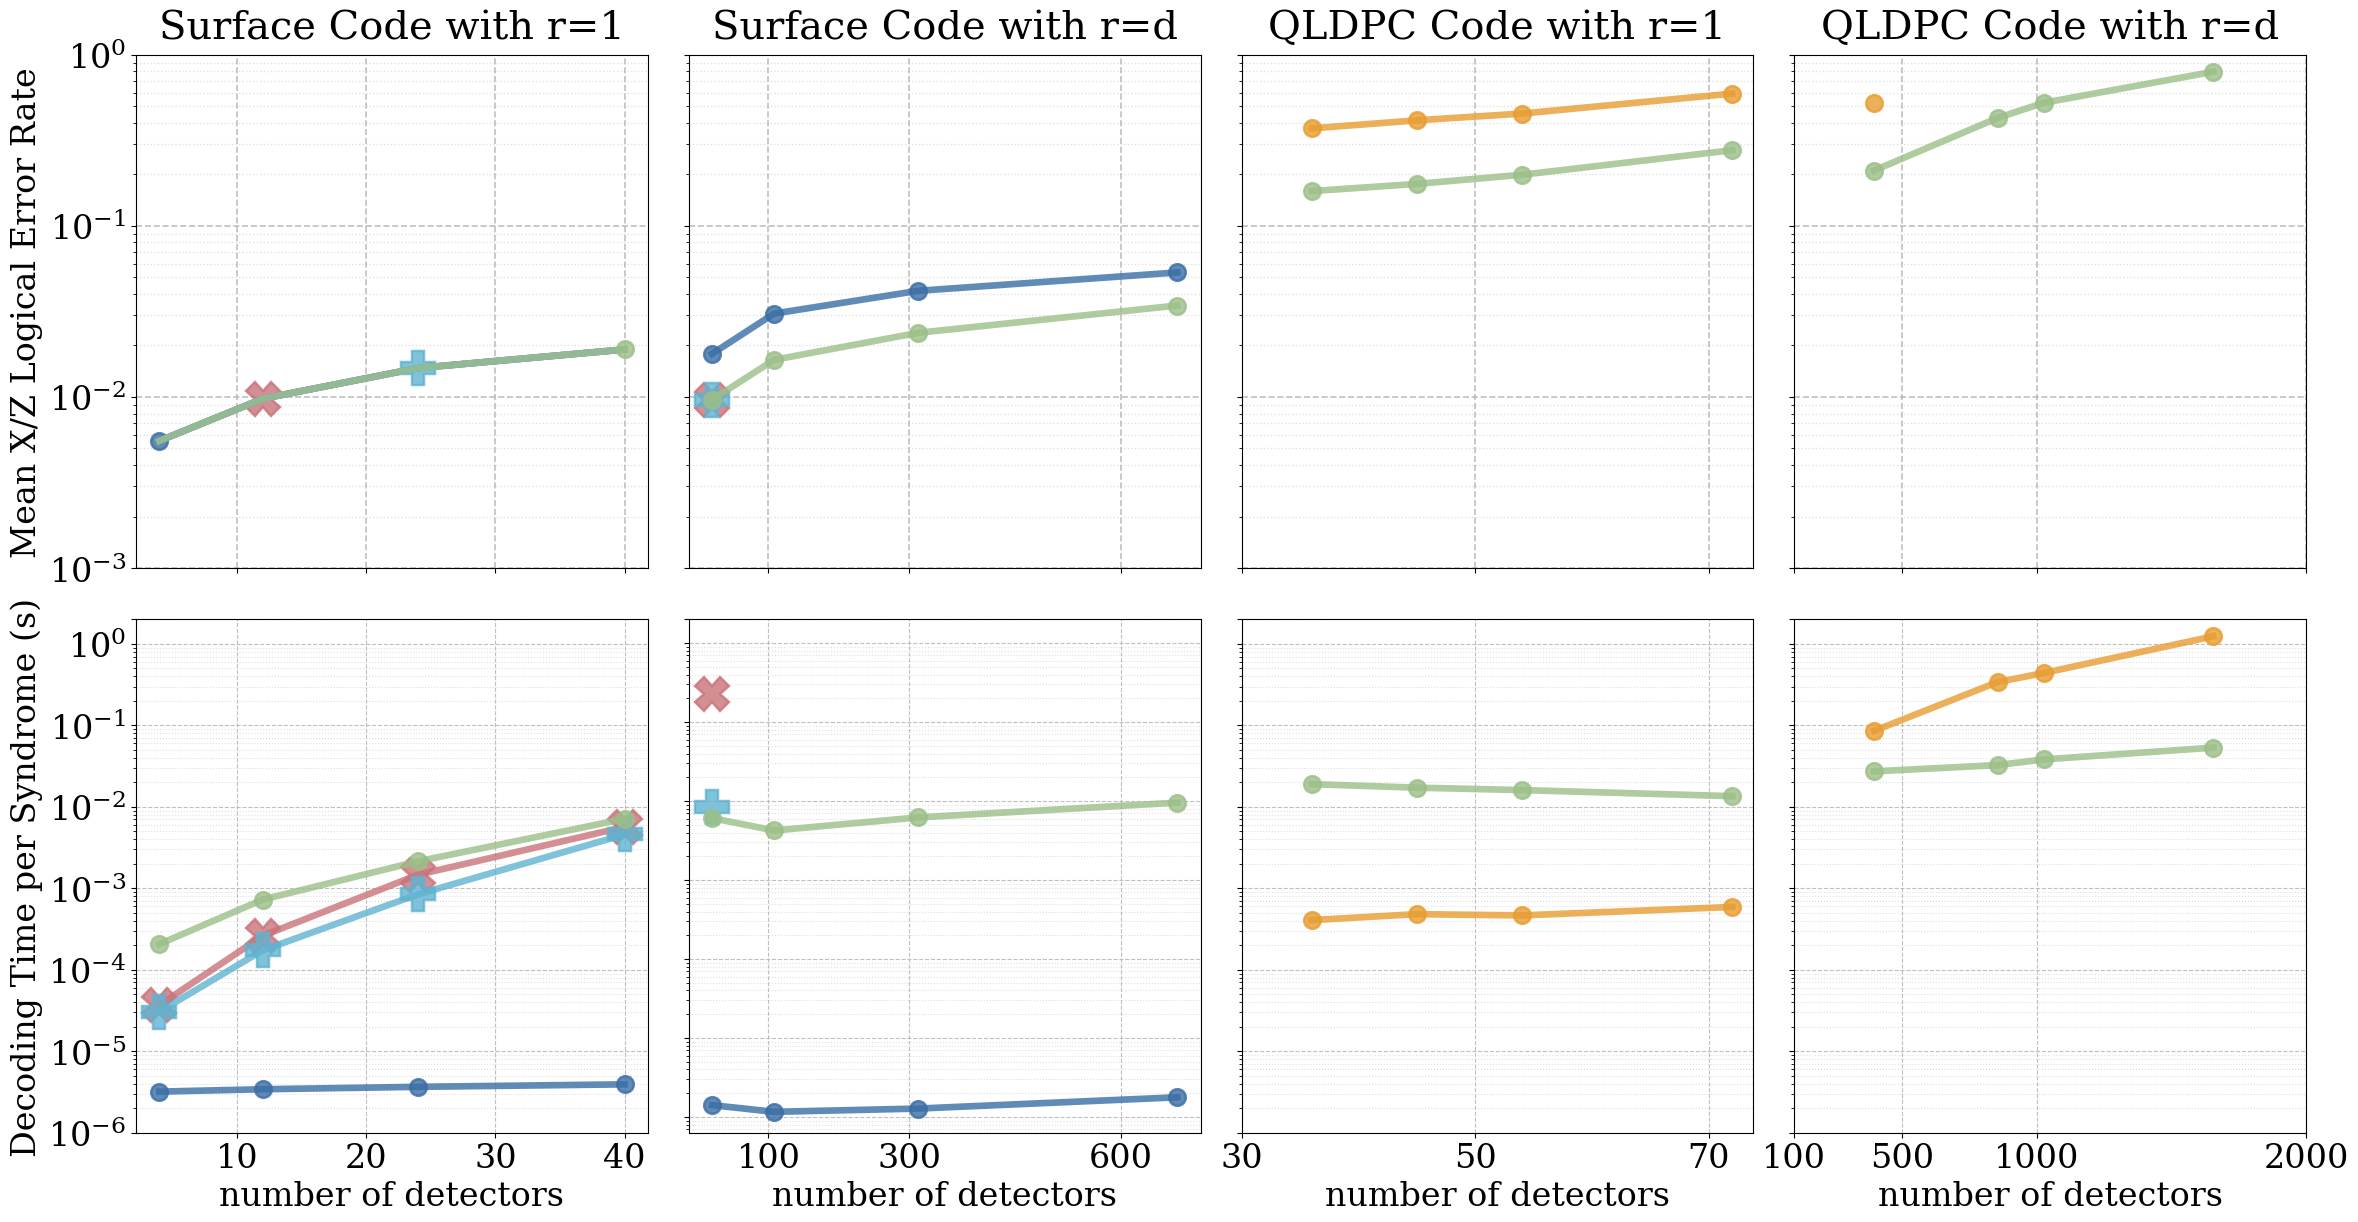

In [31]:
import matplotlib.pyplot as plt
from pathlib import Path

# 创建包含2行4列子图的图形
fig, axes = plt.subplots(2, 4, figsize=(28, 14))

# 第一行：绘制逻辑错误率图
plot_logical_error_rate_ax(axes[0, 0], r1_df, r="1", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=True)
plot_logical_error_rate_ax(axes[0, 1], rd_df, r="d", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[100, 300, 600], use_markevery=False)
plot_logical_error_rate_ax(axes[0, 2], qldpc_r1_df, r="1", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[30, 50, 70], use_markevery=False)
plot_logical_error_rate_ax(axes[0, 3], qldpc_rd_df, r="d", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[100, 500, 1000, 2000], use_markevery=False)

# 第二行：绘制速度图
plot_speed_ax(axes[1, 0], r1_df_speed, r="1", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=True, use_markevery=False)
plot_speed_ax(axes[1, 1], rd_df_speed, r="d", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, x_ticks=[100, 300, 600], use_markevery=False)
plot_speed_ax(axes[1, 2], qldpc_r1_df_speed, r="1", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, x_ticks=[30, 50, 70], use_markevery=False)
plot_speed_ax(axes[1, 3], qldpc_rd_df_speed, r="d", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, x_ticks=[100, 500, 1000, 2000], use_markevery=False)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.08, hspace=0.1)  # wspace 控制子图之间的水平间距，hspace 控制子图之间的垂直间距

# 保存图片为PDF
save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/overall_performance_result")
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / "merged_plots_combined.pdf"
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

plt.show()

### 平均降低率

In [32]:
rd_df

,detector_number,d,round,approximate_param,priority,priority_topk,decoder_method,have_stabilizer,logical_error_rate
8,20,3,3,100,-2,150,EAMLD,False,0.009640
9,20,3,3,100,-2,150,EMLD,False,0.009640
10,20,3,3,100,-2,150,MLD,False,0.009640
11,20,3,3,100,-2,150,MWPM,False,0.017865
20,108,5,5,100,-2,150,EAMLD,False,0.016475
21,108,5,5,100,-2,150,MWPM,False,0.030695
22,312,7,7,100,-2,150,EAMLD,False,0.023695
23,312,7,7,100,-2,150,MWPM,False,0.041690
24,680,9,9,100,-2,150,EAMLD,False,0.034225
25,680,9,9,100,-2,150,MWPM,False,0.053410


In [33]:
eamld_data = rd_df[rd_df['decoder_method'] == 'EAMLD']['logical_error_rate']
mwpm_data = rd_df[rd_df['decoder_method'] == 'MWPM']['logical_error_rate']

# 计算降低率
reduction_rates = (mwpm_data.values - eamld_data.values) / mwpm_data.values

# 计算平均降低率
average_reduction_rate = reduction_rates.mean()

print("EAMLD 的 logical_error_rate 相对于 MWPM 的 logical_error_rate 的平均降低率为:", average_reduction_rate)

EAMLD 的 logical_error_rate 相对于 MWPM 的 logical_error_rate 的平均降低率为: 0.42862643435366743


In [34]:
qldpc_r1_df

eamld_data = qldpc_r1_df[qldpc_r1_df['decoder_method'] == 'EAMLD']['logical_error_rate']
bposd_data = qldpc_r1_df[qldpc_r1_df['decoder_method'] == 'BP+OSD']['logical_error_rate']

# 计算降低率
reduction_rates = (bposd_data.values - eamld_data.values) / bposd_data.values

# 计算平均降低率
average_reduction_rate = reduction_rates.mean()

print("EAMLD 的 logical_error_rate 相对于 BP+OSD 的 logical_error_rate 的平均降低率为:", average_reduction_rate)

EAMLD 的 logical_error_rate 相对于 BP+OSD 的 logical_error_rate 的平均降低率为: 0.5598750511758785
